In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 1. Data Source and Contents
The dataset is obtained from the Census Bureau and represents salaries of people along with seven demographic variables. The following is a description of our dataset:
- Number of target classes: 2 ('>50K' and '<=50K') [ Labels: 1, 0 ]
- Number of attributes (Columns): 7
- Number of instances (Rows): 48,842

In [2]:
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true")
df = df.drop('capital_gl_bin', axis=1)
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


## Data Quality Analysis (DQA)

In [3]:
def data_quality_analysis(dataframe):
    print('shape:', dataframe.shape)
    print()

    # print column data types
    print('dtypes:')
    print(dataframe.dtypes)
    print()

    # check for missing values
    print('missing values:')
    print(dataframe.isnull().sum())
    print()

    #print('missing values percentages:')
    #print((dataframe.isnull().sum()/len(df))*100)
    
    # print descriptive statistics
    print(dataframe, 'descriptive statistics:')
    print(dataframe.describe())
    
data_quality_analysis(df)

shape: (48842, 10)

dtypes:
hours_per_week_bin    object
occupation_bin        object
msr_bin               object
race_sex_bin          object
education_num_bin     object
education_bin         object
workclass_bin         object
age_bin               object
flag                  object
y                      int64
dtype: object

missing values:
hours_per_week_bin    0
occupation_bin        0
msr_bin               0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

      hours_per_week_bin occupation_bin  msr_bin race_sex_bin  \
0               b. 31-40   b. Mid - Low   b. Mid      c. High   
1                a. 0-30        e. High  c. High      c. High   
2               b. 31-40         a. Low   b. Mid      c. High   
3               b. 31-40         a. Low  c. High       b. Mid   
4               b. 31-40        e. High  c. High       a. Low   
...    

- All X columns are stored as strings and need formatting
- No missing values

In [4]:
def col_val_printer(dataframe):
    for col in dataframe.columns:
        unique_values = dataframe[col].unique()
        print(f"{col}: {unique_values}")
        
col_val_printer(df)

hours_per_week_bin: ['b. 31-40' 'a. 0-30' 'd. 41-50 & 61-70' 'c. 71-100' 'e. 51-60']
occupation_bin: ['b. Mid - Low' 'e. High' 'a. Low' 'c. Mid - Mid' 'd. Mid - High']
msr_bin: ['b. Mid' 'c. High' 'a. Low']
race_sex_bin: ['c. High' 'b. Mid' 'a. Low']
education_num_bin: ['c. 13' 'b. 9-12' 'a. 0-8' 'd. 14' 'e. 15+']
education_bin: ['c. Bachelors' 'b. Mid' 'a. Low' 'd. Masters' 'e. High']
workclass_bin: ['b. income' 'a. no income']
age_bin: ['d. 36-40 & 56-60' 'e. 40-55' 'b. 26-30 & 71-100' 'c. 31-35 & 61-70'
 'a. 0-25']
flag: ['train' 'test']
y: [0 1]


In [5]:
# make a copy of df
df_regex = df.copy()
print()

# list of column names to clean
cols_to_clean = [col for col in df_regex.columns]

# regex pattern to match
pattern = r'^[a-z]\. '

# apply the regex pattern to selected columns
for col in cols_to_clean:
    df_regex[col] = df_regex[col].astype(str).str.replace(pattern, '', regex=True)

print('cleaned unique values:')
col_val_printer(df_regex)


cleaned unique values:
hours_per_week_bin: ['31-40' '0-30' '41-50 & 61-70' '71-100' '51-60']
occupation_bin: ['Mid - Low' 'High' 'Low' 'Mid - Mid' 'Mid - High']
msr_bin: ['Mid' 'High' 'Low']
race_sex_bin: ['High' 'Mid' 'Low']
education_num_bin: ['13' '9-12' '0-8' '14' '15+']
education_bin: ['Bachelors' 'Mid' 'Low' 'Masters' 'High']
workclass_bin: ['income' 'no income']
age_bin: ['36-40 & 56-60' '40-55' '26-30 & 71-100' '31-35 & 61-70' '0-25']
flag: ['train' 'test']
y: ['0' '1']


one-hot encoding: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [6]:
# make a copy of df_regex
df_dummies = df_regex.copy()

# list comprehension to include all columns except for 'flag' and 'y'
dummy_columns = [col for col in df_dummies.columns if col not in ['flag', 'y']]

# one-hot encoding
df_dummies = pd.get_dummies(df_dummies, columns=dummy_columns)

# print unique values now that columns are one-hot encoded
col_val_printer(df_dummies)

flag: ['train' 'test']
y: ['0' '1']
hours_per_week_bin_0-30: [0 1]
hours_per_week_bin_31-40: [1 0]
hours_per_week_bin_41-50 & 61-70: [0 1]
hours_per_week_bin_51-60: [0 1]
hours_per_week_bin_71-100: [0 1]
occupation_bin_High: [0 1]
occupation_bin_Low: [0 1]
occupation_bin_Mid - High: [0 1]
occupation_bin_Mid - Low: [1 0]
occupation_bin_Mid - Mid: [0 1]
msr_bin_High: [0 1]
msr_bin_Low: [0 1]
msr_bin_Mid: [1 0]
race_sex_bin_High: [1 0]
race_sex_bin_Low: [0 1]
race_sex_bin_Mid: [0 1]
education_num_bin_0-8: [0 1]
education_num_bin_13: [1 0]
education_num_bin_14: [0 1]
education_num_bin_15+: [0 1]
education_num_bin_9-12: [0 1]
education_bin_Bachelors: [1 0]
education_bin_High: [0 1]
education_bin_Low: [0 1]
education_bin_Masters: [0 1]
education_bin_Mid: [0 1]
workclass_bin_income: [1 0]
workclass_bin_no income: [0 1]
age_bin_0-25: [0 1]
age_bin_26-30 & 71-100: [0 1]
age_bin_31-35 & 61-70: [0 1]
age_bin_36-40 & 56-60: [1 0]
age_bin_40-55: [0 1]


In [7]:
df_dummies

,flag,y,hours_per_week_bin_0-30,hours_per_week_bin_31-40,hours_per_week_bin_41-50 & 61-70,hours_per_week_bin_51-60,hours_per_week_bin_71-100,occupation_bin_High,occupation_bin_Low,occupation_bin_Mid - High,...,education_bin_Low,education_bin_Masters,education_bin_Mid,workclass_bin_income,workclass_bin_no income,age_bin_0-25,age_bin_26-30 & 71-100,age_bin_31-35 & 61-70,age_bin_36-40 & 56-60,age_bin_40-55
0,train,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,train,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,train,0,0,1,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
3,train,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,train,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,test,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
48838,test,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
48839,test,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
48840,test,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [8]:
# convert 'y' column to integer
df_dummies['y'] = df_dummies['y'].astype(int)

# data quality analysis on df_dummies
data_quality_analysis(df_dummies)

shape: (48842, 35)

dtypes:
flag                                object
y                                    int64
hours_per_week_bin_0-30              uint8
hours_per_week_bin_31-40             uint8
hours_per_week_bin_41-50 & 61-70     uint8
hours_per_week_bin_51-60             uint8
hours_per_week_bin_71-100            uint8
occupation_bin_High                  uint8
occupation_bin_Low                   uint8
occupation_bin_Mid - High            uint8
occupation_bin_Mid - Low             uint8
occupation_bin_Mid - Mid             uint8
msr_bin_High                         uint8
msr_bin_Low                          uint8
msr_bin_Mid                          uint8
race_sex_bin_High                    uint8
race_sex_bin_Low                     uint8
race_sex_bin_Mid                     uint8
education_num_bin_0-8                uint8
education_num_bin_13                 uint8
education_num_bin_14                 uint8
education_num_bin_15+                uint8
education_num_bin_9-12    

                  y  hours_per_week_bin_0-30  hours_per_week_bin_31-40  \
count  48842.000000             48842.000000              48842.000000   
mean       0.239282                 0.160743                  0.545412   
std        0.426649                 0.367297                  0.497939   
min        0.000000                 0.000000                  0.000000   
25%        0.000000                 0.000000                  0.000000   
50%        0.000000                 0.000000                  1.000000   
75%        0.000000                 0.000000                  1.000000   
max        1.000000                 1.000000                  1.000000   

       hours_per_week_bin_41-50 & 61-70  hours_per_week_bin_51-60  \
count                      48842.000000              48842.000000   
mean                           0.201036                  0.076962   
std                            0.400779                  0.266535   
min                            0.000000                  

Training and Test Data: There is a column indicating the rows to be used as “Training Data” and “Testing Data”. You can programmatically create your Training and Testing datasets as separate dataframes in your code based on this column value.

In [9]:
# partition df_dummies in two by train/test in flag column
df_train = df_dummies.loc[df_dummies['flag'] == 'train']
df_test = df_dummies.loc[df_dummies['flag'] == 'test']

# print unique values within flag column in both dataframes
print('train-flag unique values:', df_train['flag'].unique())
print('test-flag unique values:', df_test['flag'].unique())

# drop flag column altogether in both dataframes
df_train_no_flag = df_train.drop('flag', axis=1)
df_test_no_flag = df_train.drop('flag', axis=1)

print()

# test whether the column is still in both dataframes
print('no flag column in df_train_no_flag?:', 'flag' not in df_train_no_flag.columns)
print('no flag column in df_test_no_flag?:', 'flag' not in df_test_no_flag.columns)

train-flag unique values: ['train']
test-flag unique values: ['test']

no flag column in df_train_no_flag?: True
no flag column in df_test_no_flag?: True


# 2. Finding Optimal Value of a key Ensemble Method Hyper-parameter
For Ensemble Models, one of the key hyper-parameter is number of “estimators”. You are required to find its best value by creating the following line graphs:
- Accuracy Vs. `n_estimators`
- AUC Vs. `n_estimators`

# 3. Building a Random Forest Model
Using Notebook, and the same data source from CA03, train a Random Forest Model. Using similar approach of Section 2 above, plot a graph of Accuracy vs. `n_estimator` and AUC Vs. `n_estimator`. Use `n_estimator` values as `[50,100,150,200,250,300,350,400,450,500]`. Keep all other hyperparameter values at default.

In [10]:
# manually train, test, splitting
X_train = df_train_no_flag.drop('y', axis=1)
y_train = df_train_no_flag.y

X_test = df_test_no_flag.drop('y', axis=1)
y_test = df_test_no_flag.y

In [11]:
# import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

## import 
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay, plot_roc_curve

RandomForestClassifier



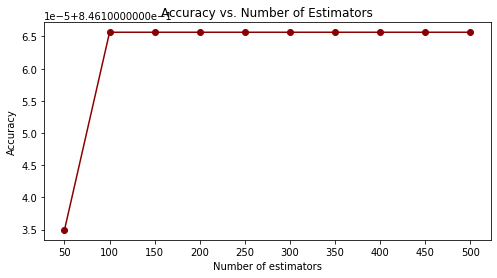

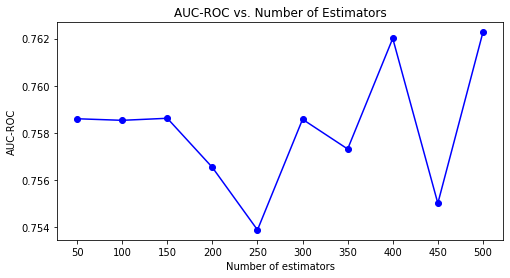

In [12]:
 def n_estimator_tester(ensemble_model):
        model_accuracy_results = []
        model_auc_results = []

        n_estimator_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

        for n in n_estimator_options:

            model = ensemble_model(n_estimators=n)
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            # calculate accuracy score
            accuracy = np.mean(y_test==y_pred)
            model_accuracy_results.append(accuracy)
            #print("accuracy score for", n, "number of iterators:", accuracy)

            # calculate ROC AUC score
            test_auc = roc_auc_score(y_test, y_pred)
            model_auc_results.append(test_auc)
            #print("test auc for", n, "number of iterators:", test_auc)

            #print()
        
        # extract the name of the ensemble model as a string
        ensemble_model_name = ensemble_model.__name__
        
        '''
        # find the maximum accuracy and AUC-ROC scores
        if ensemble_model_name == 'RandomForestClassifier':
            rfc_accuracy_max = max(model_accuracy_results)
            rfc_auc_max = max(model_auc_results)
        if ensemble_model_name == 'AdaBoostClassifier':
            ada_boost_accuracy_max = max(model_accuracy_results)
            ada_boost_auc_max = max(model_auc_results)
        if ensemble_model_name == 'GradientBoostingClassifier':
            gradient_boost_accuracy_max = max(model_accuracy_results)
            gradient_boost_auc_max = max(model_auc_results)
        if ensemble_model_name == 'XGBClassifier':
            XGBClassifier_accuracy_max = max(model_accuracy_results)
            XGBClassifier_auc_max = max(model_auc_results)
        ''' # my code
        
        # find the maximum accuracy and AUC-ROC scores
        accuracy_max = max(model_accuracy_results) #ChatGPT
        auc_max = max(model_auc_results) #ChatGPT

        print(ensemble_model_name)

        plt.figure(figsize=(8, 4))
        pd.Series(model_accuracy_results, n_estimator_options).plot(color="darkred", marker="o")
        plt.xlabel("Number of estimators")
        plt.ylabel("Accuracy")
        plt.title("Accuracy vs. Number of Estimators")
        plt.xticks(np.arange(50, 550, step=50))

        print()

        plt.figure(figsize=(8, 4))
        pd.Series(model_auc_results, n_estimator_options).plot(color="blue", marker="o")
        plt.xlabel("Number of estimators")
        plt.ylabel("AUC-ROC")
        plt.title("AUC-ROC vs. Number of Estimators")
        plt.xticks(np.arange(50, 550, step=50))
        
        return accuracy_max, auc_max
    
rfc_accuracy_max, rfc_auc_max = n_estimator_tester(RandomForestClassifier)

# 4. Building AdaBoost, Gradient Boost, and XGB
Repeat the process of Section 3 above for AdaBoost, Gradient Boost, and XGB Classifiers.

In [13]:
# import libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## RandomForestClassifier

RandomForestClassifier



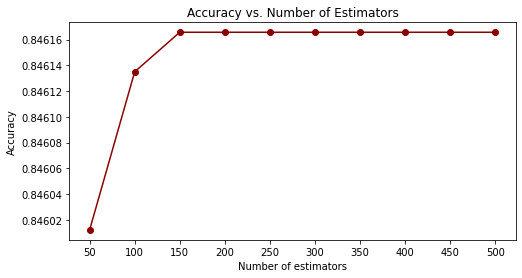

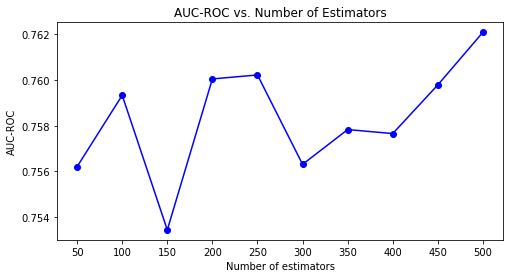

In [14]:
# running RandomForestClassifier again
rfc_accuracy_max, rfc_auc_max = n_estimator_tester(RandomForestClassifier)

Answer the following questions for Random Forest model and each algorithm in 4:

**1. Write your observations about the Classifier’s behavior with respect to the number of estimators**

A: In terms of accuracy, the range of the y-axis is small so accuracy scores are similar across different numbers of estimators. However, they perform slighlty better starting at 150 estimators. The AUC scores vary largely by number of estimators, but the y-axis range is also very small.

**2. Is there an optimal value of the estimator within the given range?**

A: 500 estimators

## AdaBoostClassifier

AdaBoostClassifier



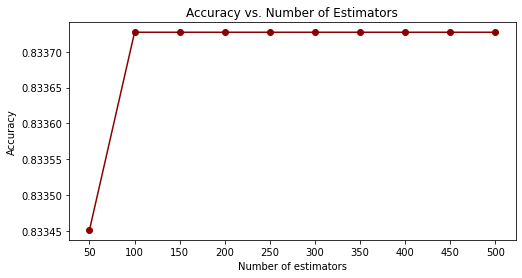

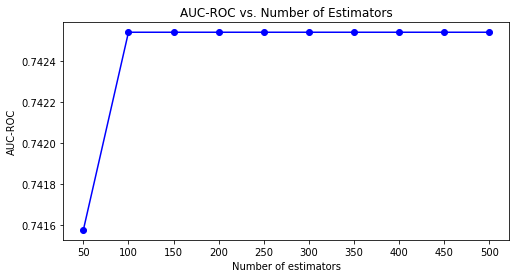

In [15]:
# running AdaBoostClassifier
ada_boost_accuracy_max, ada_boost_auc_max = n_estimator_tester(AdaBoostClassifier)

**1. Write your observations about the Classifier’s behavior with respect to the number of estimators**

A: In terms of accuracy, the range of the y-axis is small so accuracy scores are similar across different numbers of estimators. However, they perform slighlty better starting at 100 estimators. The AUC scores also perform slightly better starting at 100 estimators.

**2. Is there an optimal value of the estimator within the given range?**

A: 100 estimatos <= `n_estimators`

## GradientBoostingClassifier

GradientBoostingClassifier



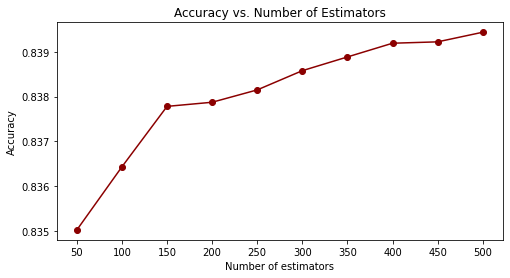

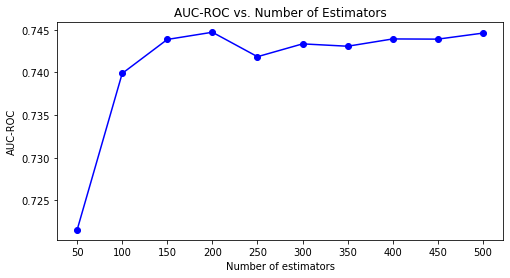

In [16]:
# running GradientBoostingClassifier
gradient_boost_accuracy_max, gradient_boost_auc_max = n_estimator_tester(GradientBoostingClassifier)

**1. Write your observations about the Classifier’s behavior with respect to the number of estimators**

A: In terms of accuracy, the range of the y-axis is small so accuracy scores are similar across different numbers of estimators. However, they perform best at 500 estimators. The AUC scores also perform slightly better starting at 100 estimators.

**2. Is there an optimal value of the estimator within the given range?**

A: 500 estimators

## XGBClassifier

XGBClassifier



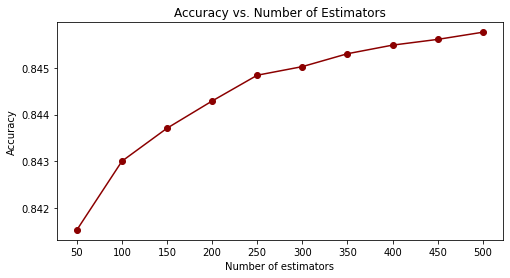

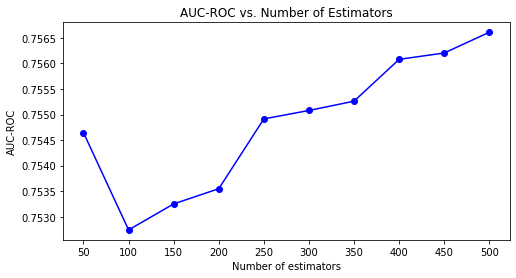

In [17]:
# running XGBClassifier
XGBClassifier_accuracy_max, XGBClassifier_auc_max = n_estimator_tester(XGBClassifier)

**1. Write your observations about the Classifier’s behavior with respect to the number of estimators**

A: In terms of accuracy, the range of the y-axis is small so accuracy scores are similar across different numbers of estimators. However, they perform best at 500 estimators. The AUC scores range is also small, but out of the tested number of estimators, 500 seems to be best.

**2. Is there an optimal value of the estimator within the given range?**

A: 500 estimators

# 5. Compare Performance
For the best values of Accuracy and AUC for four models (Random Forest, AdaBoost,
Gradient Boost, XGB) in the previous steps, fill up the following table:

In [18]:
performance_dict = {"Random Forest": [rfc_accuracy_max, rfc_auc_max],
                    "AdaBoost": [ada_boost_accuracy_max, ada_boost_auc_max],
                    "Gradient Boost": [gradient_boost_accuracy_max, gradient_boost_auc_max],
                    "XGB": [XGBClassifier_accuracy_max, XGBClassifier_auc_max]}

performance_df = pd.DataFrame(performance_dict, index=["Accuracy", "AUC"])
performance_df

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.846166,0.833727,0.839440,0.845766
AUC,0.762098,0.742542,0.744706,0.756610


# Library Versions

In [19]:
import sys
import matplotlib as mpl
import sklearn as skl

print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)
print()

print("NumPy version:", np.__version__)
print("pandas version:", pd.__version__)
print("Matplotlib version:", mpl.__version__)
print("scikit-learn version:", skl.__version__)

Python version
3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) 
[GCC 9.4.0]
Version info.
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)

NumPy version: 1.22.1
pandas version: 1.4.0
Matplotlib version: 3.5.1
scikit-learn version: 1.0.2
